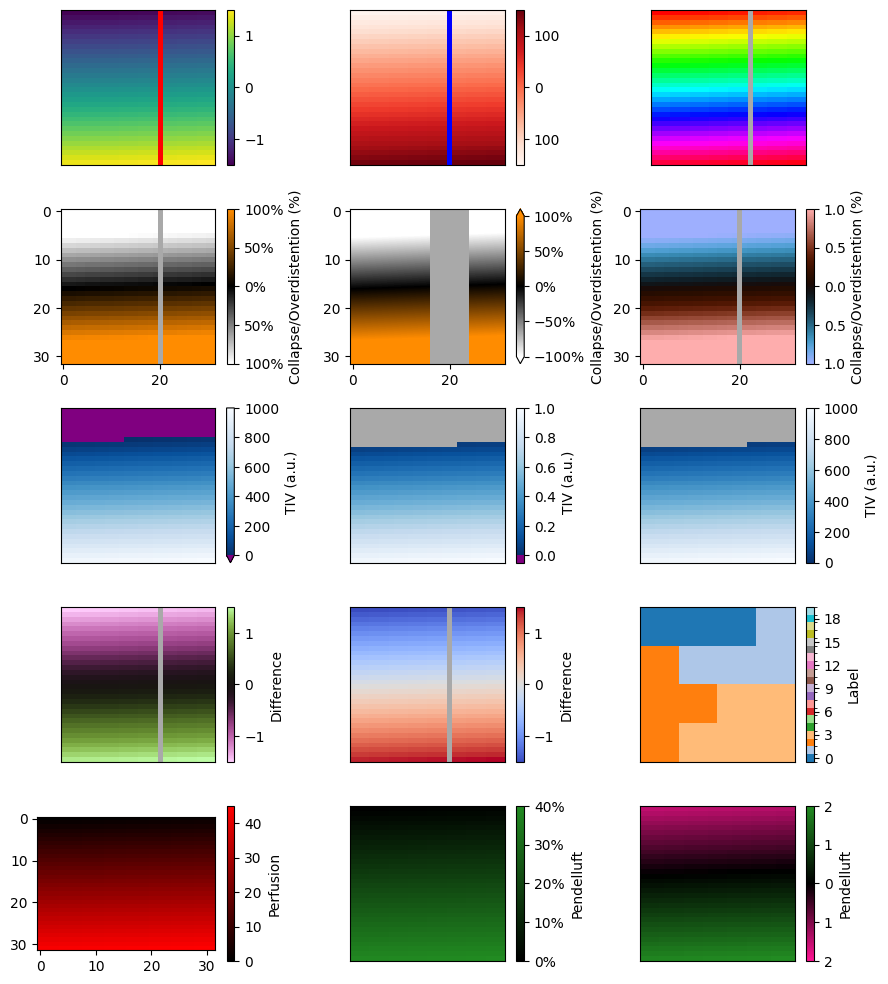

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from eitprocessing.datahandling.pixelmap import (
    DifferenceMap,
    IntegerMap,
    ODCLMap,
    PendelluftMap,
    PerfusionMap,
    PixelMap,
    SignedPendelluftMap,
    TIVMap,
)


def value_gradient(start: float, end: float, n: int = 32) -> np.ndarray:
    """Create a gradient of values from start to end in an n x n grid."""
    return np.reshape(np.linspace(start, end, n * n), (n, n))


fig, axes = plt.subplots(5, 3, figsize=(9, 10))
values = value_gradient(-1.5, 1.5)
values[:, 20] = np.nan

## PixelMap example


# Plot with NaN values and custom facecolor
PixelMap(values, plot_config={"facecolor": "red"}).plotting.imshow(ax=axes[0, 0])

# Plot with NaN values, facecolor set in imshow, and custom cmap
PixelMap(values * 100, plot_config={"cmap": "Reds", "facecolor": "red"}).plotting.imshow(
    ax=axes[0, 1], absolute=True, facecolor="blue"
)

# Plot with NaN values, cmap set in imshow
PixelMap(values).plotting.imshow(ax=axes[0, 2], colorbar=False, cmap="hsv")

## ODCLMap example
odcl_map = ODCLMap(values)

# ODCL plot with hidding axes
odcl_map.plotting.imshow(hide_axes=False, ax=axes[1, 0])

# ODCL plot overriding absolute, and with extra kwargs for imshow and colorbar
odcl_map.plotting.imshow(
    hide_axes=False, ax=axes[1, 1], interpolation="blackman", colorbar_kwargs={"extend": "both"}, absolute=False
)

# ODCL plot overriding percentage
odcl_map.plotting.imshow(hide_axes=False, ax=axes[1, 2], percentage=False, cmap="berlin")


## TIVMap example
tiv = value_gradient(-250, 1000)
tiv_map = TIVMap(tiv, suppress_negative_warning=True)

# Plot on current axes
plt.sca(axes[2, 0])
tiv_map.plotting.imshow()

# Thresholded and normalized plot
plt.sca(axes[2, 1])
mask = tiv_map.create_mask_from_threshold(50)
mask.apply(tiv_map).plotting.imshow(normalize=True, colorbar_kwargs={"extendrect": True})

# Don't extend colorbar, threshold absolute values
plt.sca(axes[2, 2])
mask.apply(tiv_map).plotting.imshow(colorbar_kwargs={"extend": None})

# Plot difference maps
diff_map = DifferenceMap(values, label="differences")

diff_map.plotting.imshow(ax=axes[3, 0])
diff_map.plotting.imshow(ax=axes[3, 1], cmap="coolwarm")

# Plot integer map
integer_map = IntegerMap([[0, 0, 0, 1], [2, 1, 1, 1], [2, 2, 3, 3], [2, 3, 3, 3]])
integer_map.plotting.imshow(ax=axes[3, 2])

# Perfusion map
perfusion_map = PerfusionMap(value_gradient(0, 45), plot_config={"hide_axes": False, "extra_kwargs": {"aspect": 0.75}})
perfusion_map.plotting.imshow(ax=axes[4, 0])

# Pendelluft map
pendelluft_map = PendelluftMap(value_gradient(0, 0.4))
pendelluft_map.plotting.imshow(ax=axes[4, 1], percentage=True)

# Replace plot parameters

signed_pendelluft_map = SignedPendelluftMap(value_gradient(-1.5, 2))
signed_pendelluft_map.plotting.imshow(ax=axes[4, 2])


fig.tight_layout()